In [ ]:
!nvidia-smi

Fri Feb  2 16:12:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/yolo

/content/drive/MyDrive/yolo


In [ ]:
!ls

data  data.yaml  README.roboflow.txt


# **Training**

In [ ]:
%cd /content/drive/MyDrive/yolo

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/yolo
100% 21.5M/21.5M [00:00<00:00, 124MB/s] 
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

In [ ]:
!ls runs/detect/train

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1706890541.730f3dc81aed.1794.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch3570.jpg  weights
P_curve.png					    train_batch3571.jpg
PR_curve.png					    train_batch3572.jpg


In [ ]:
from IPython.display import Image

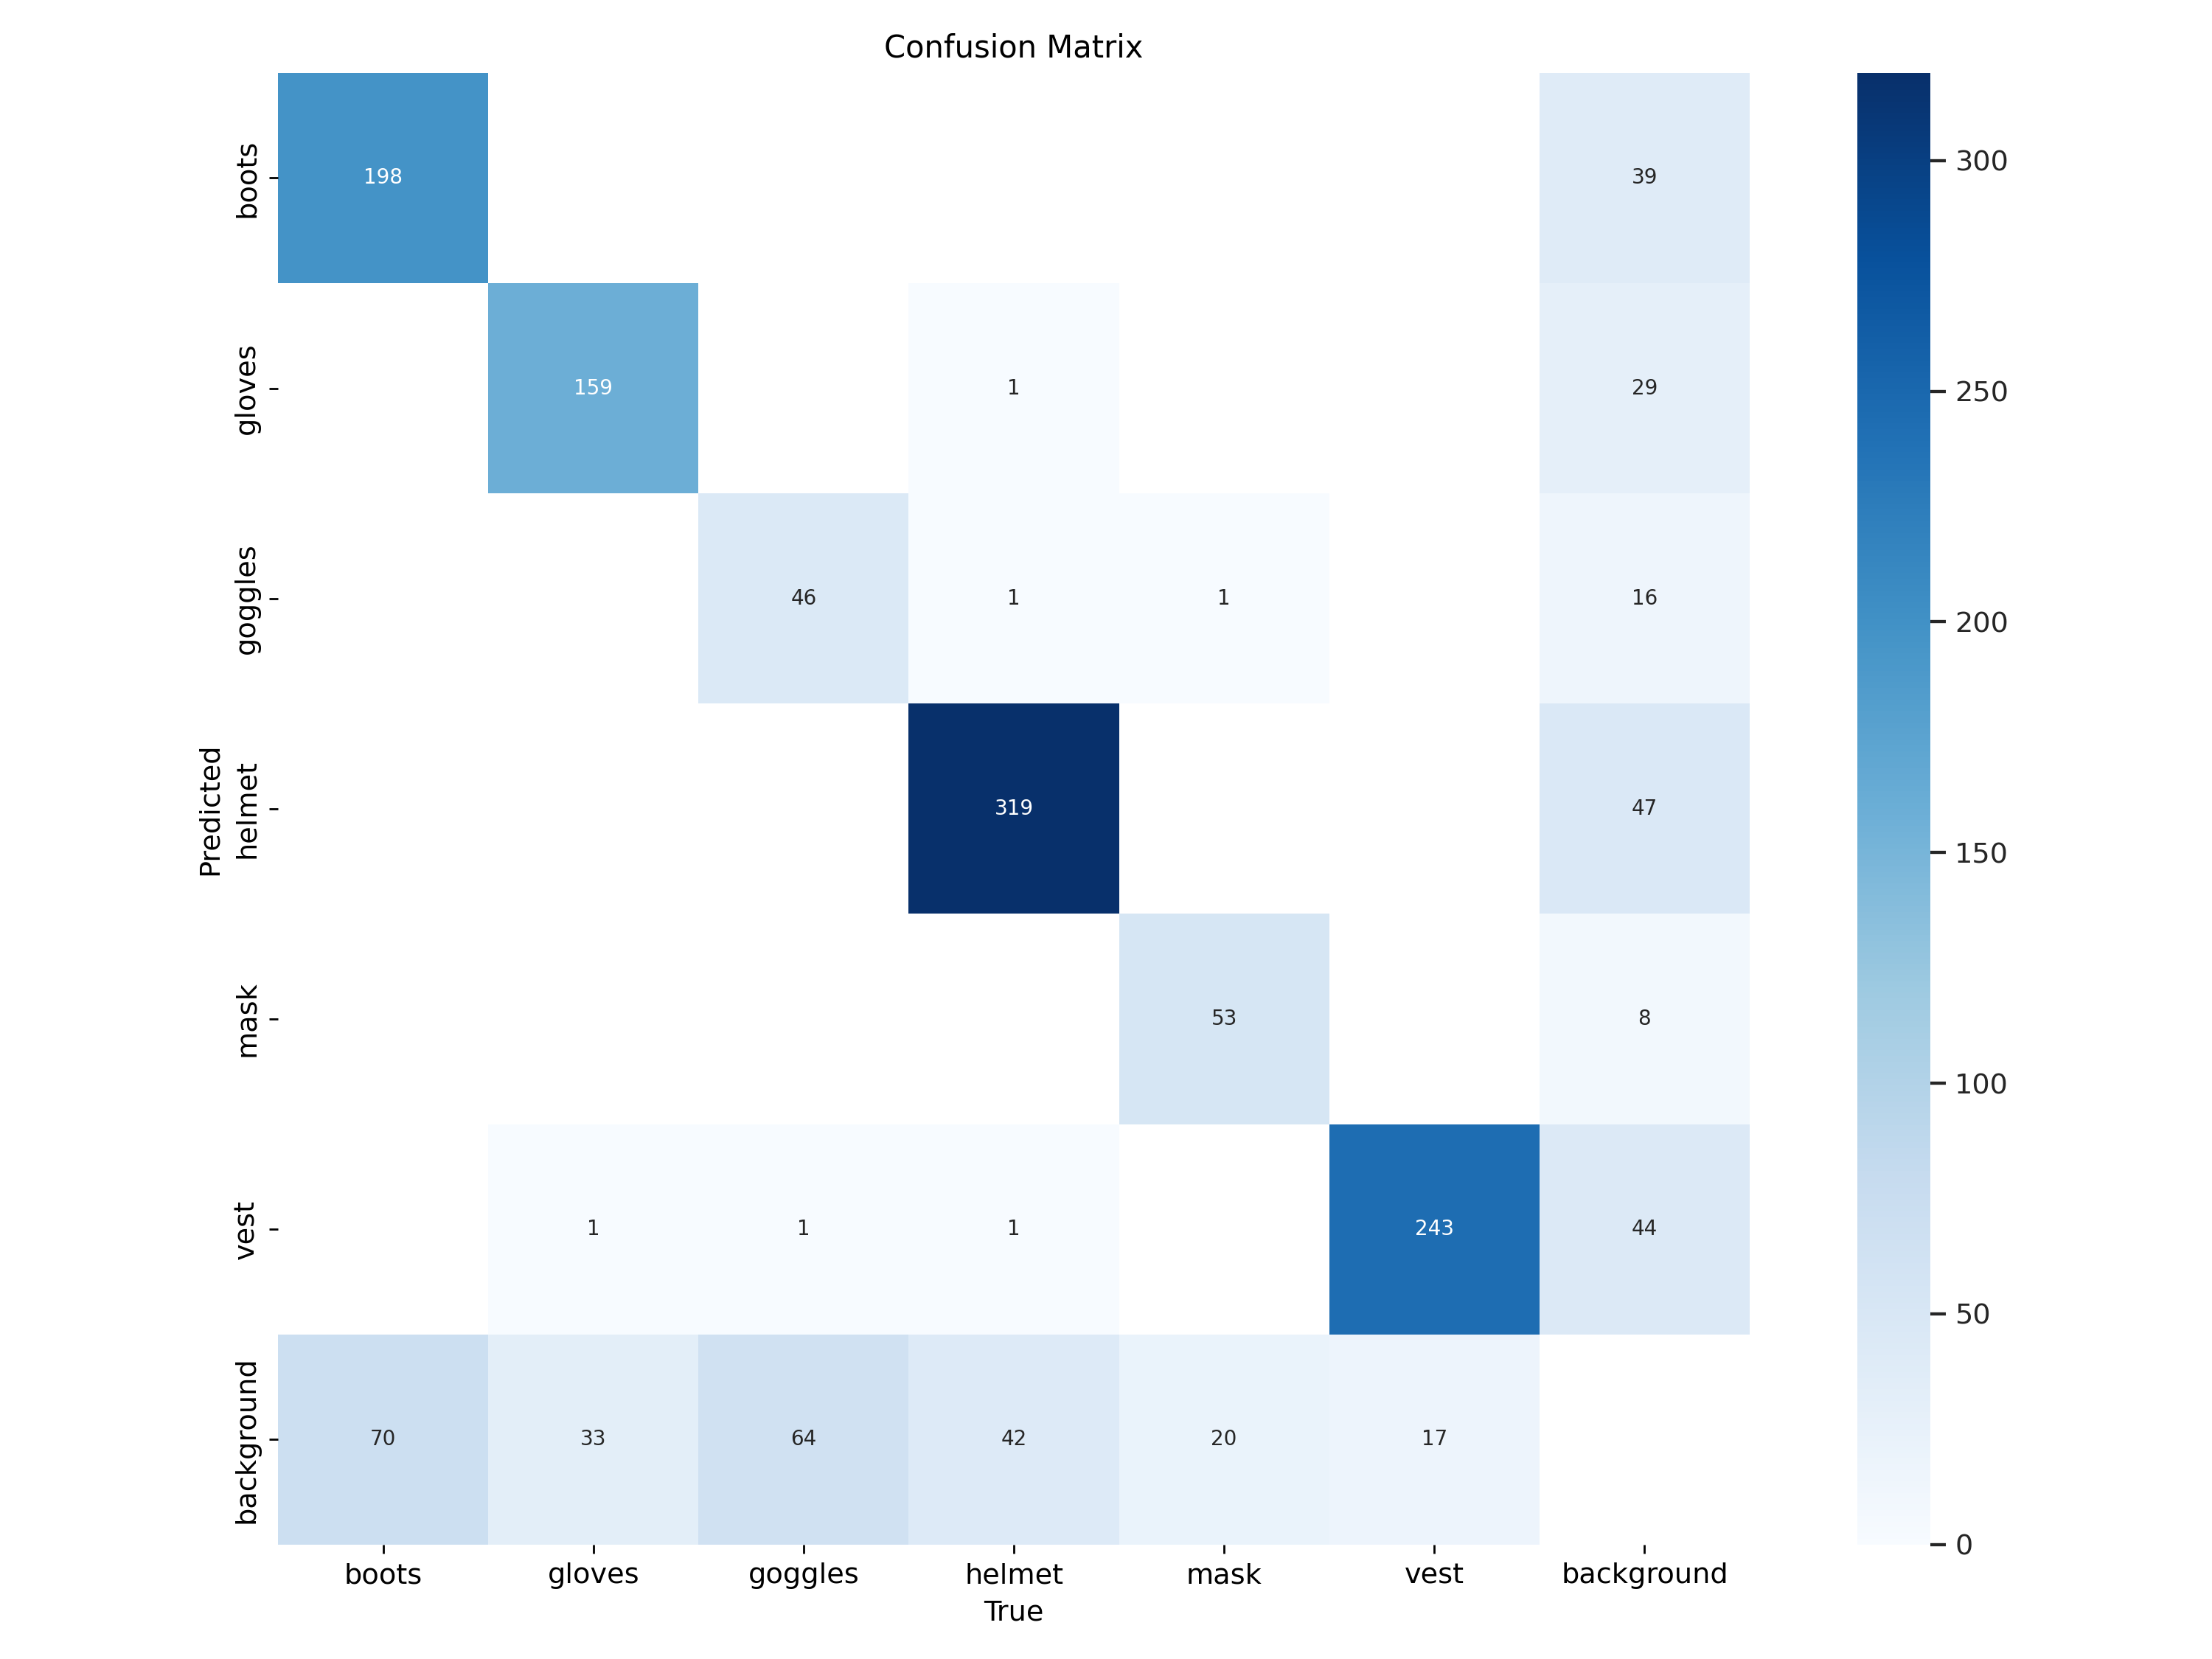

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
diagonal_score=(243+53+319+46+159+198)
total_score=(1018+70+33+64+42+20+17+44+8+47+16+29+39+6)
print(diagonal_score)
print(total_score)
accuracy=(diagonal_score/total_score)*100
print(accuracy)

1018
1453
70.06194081211287


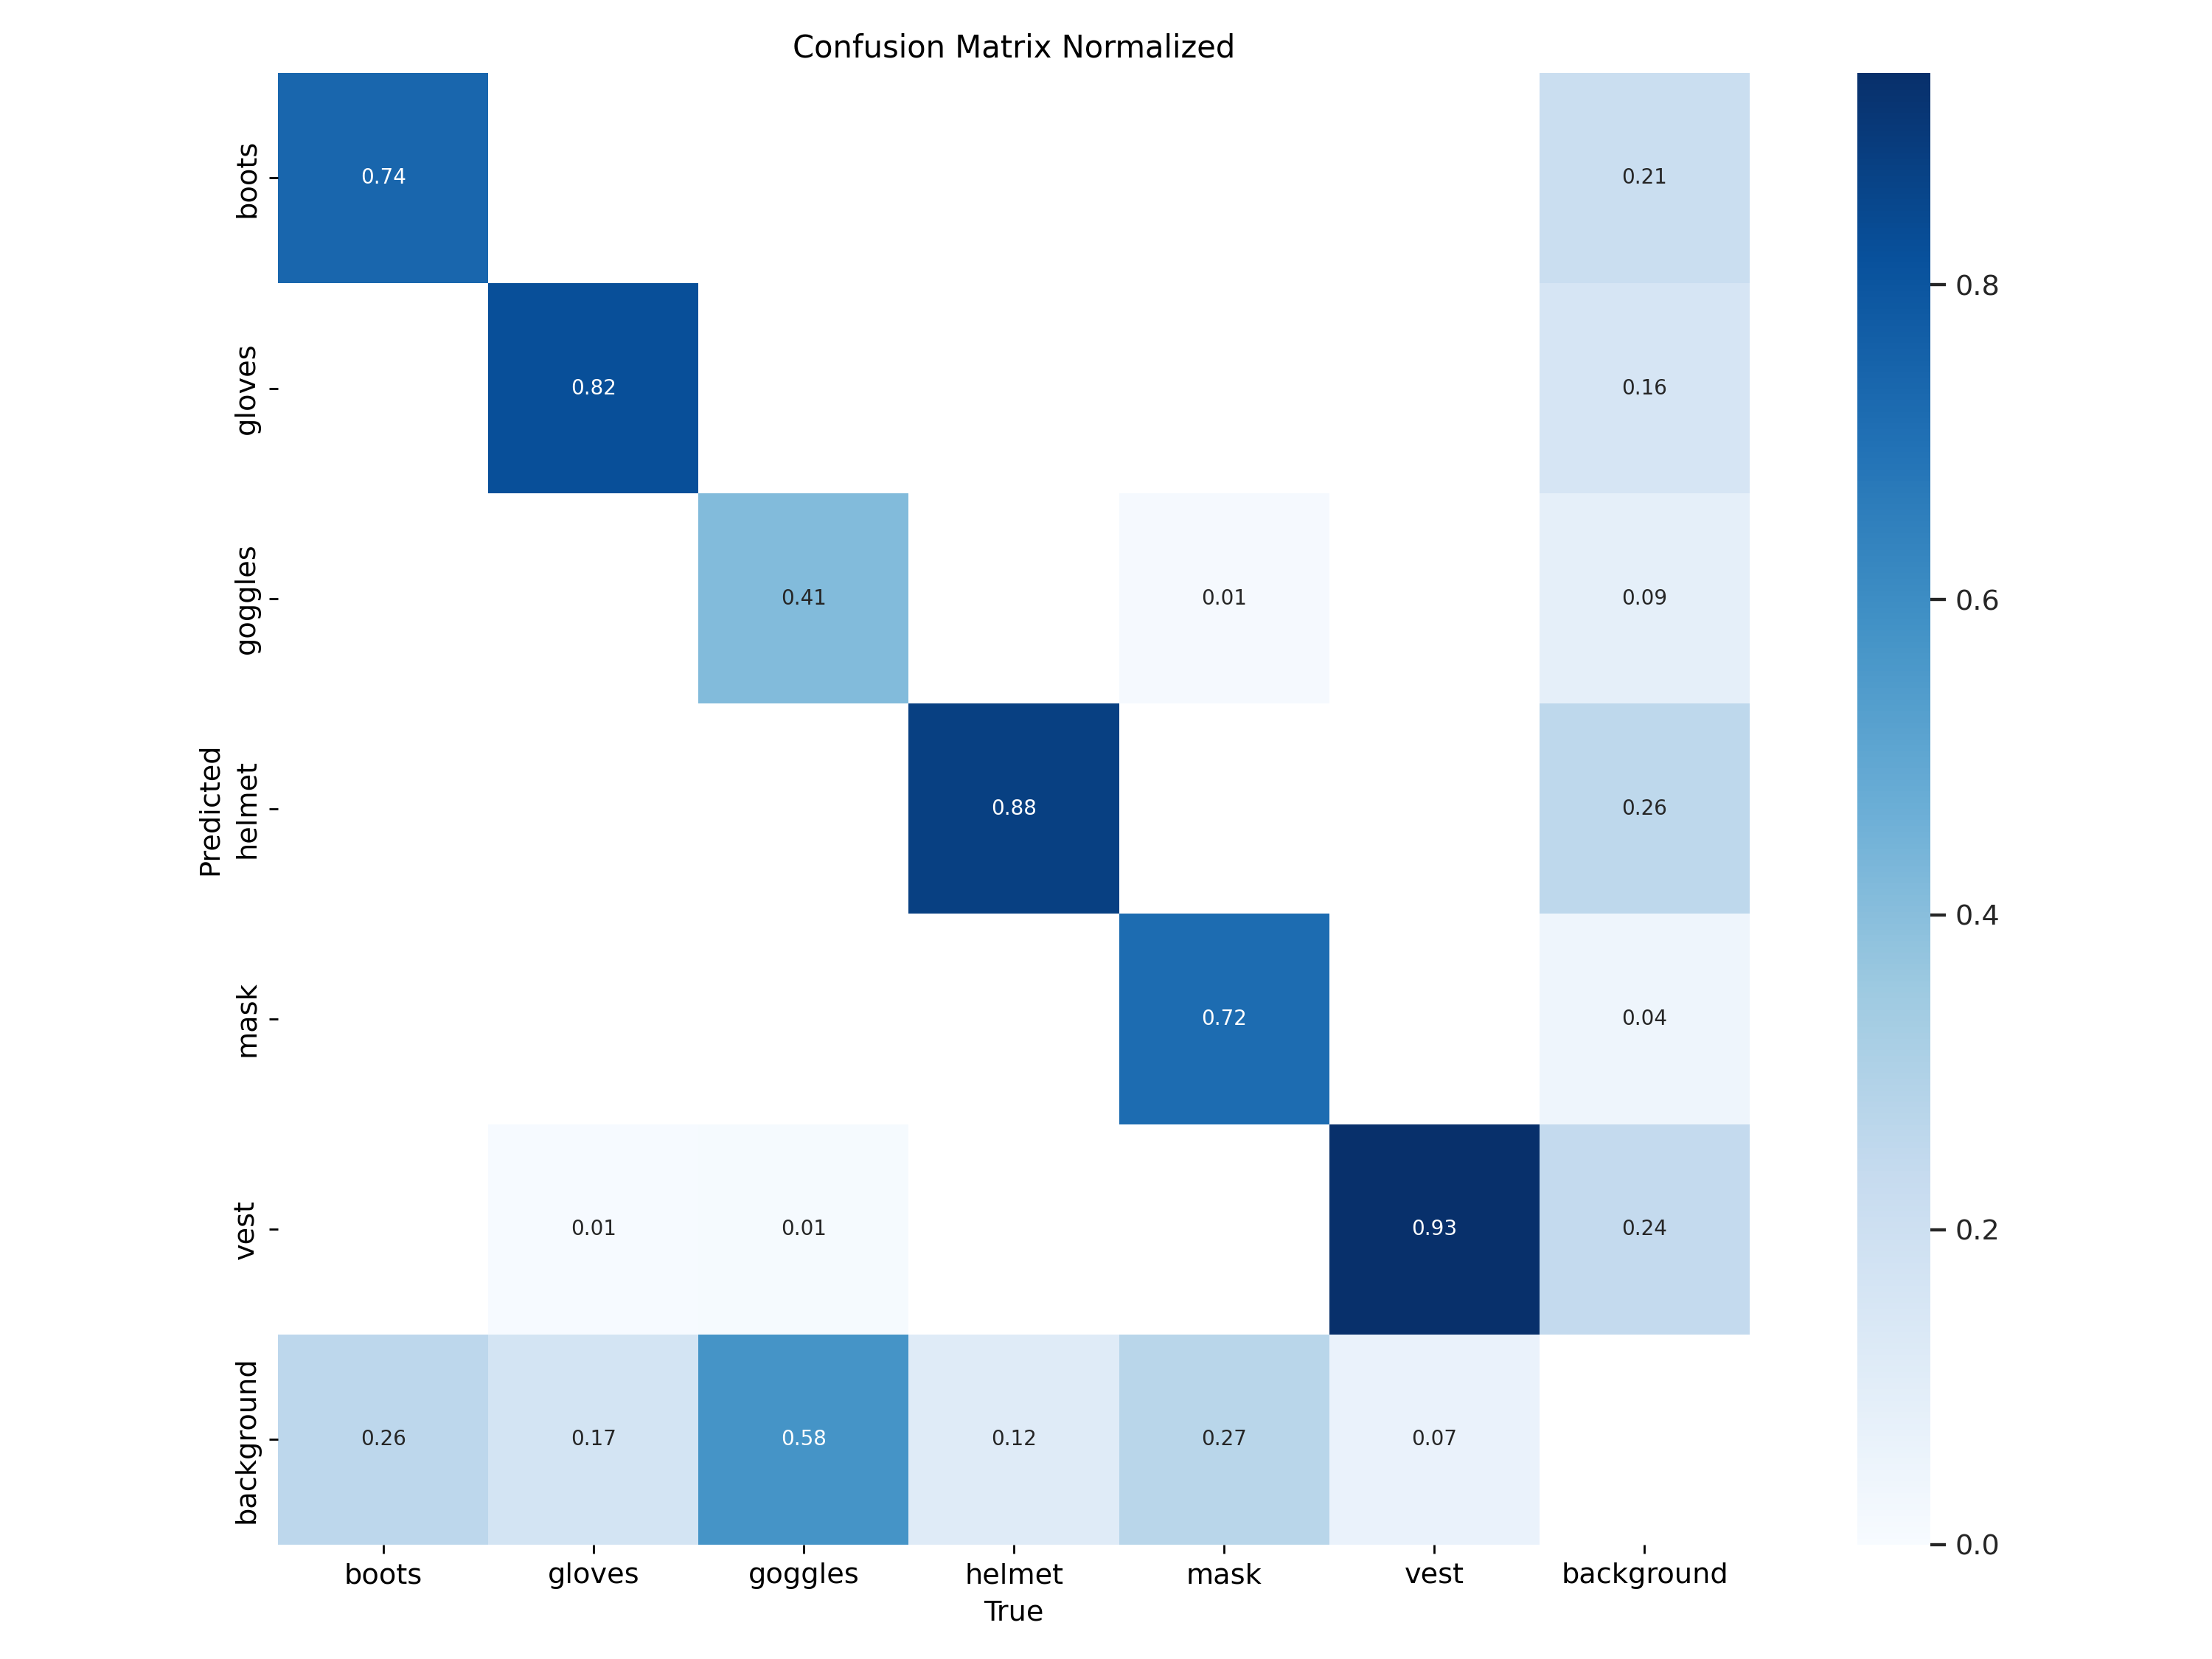

In [ ]:
Image(filename='runs/detect/train/confusion_matrix_normalized.png', width=600)

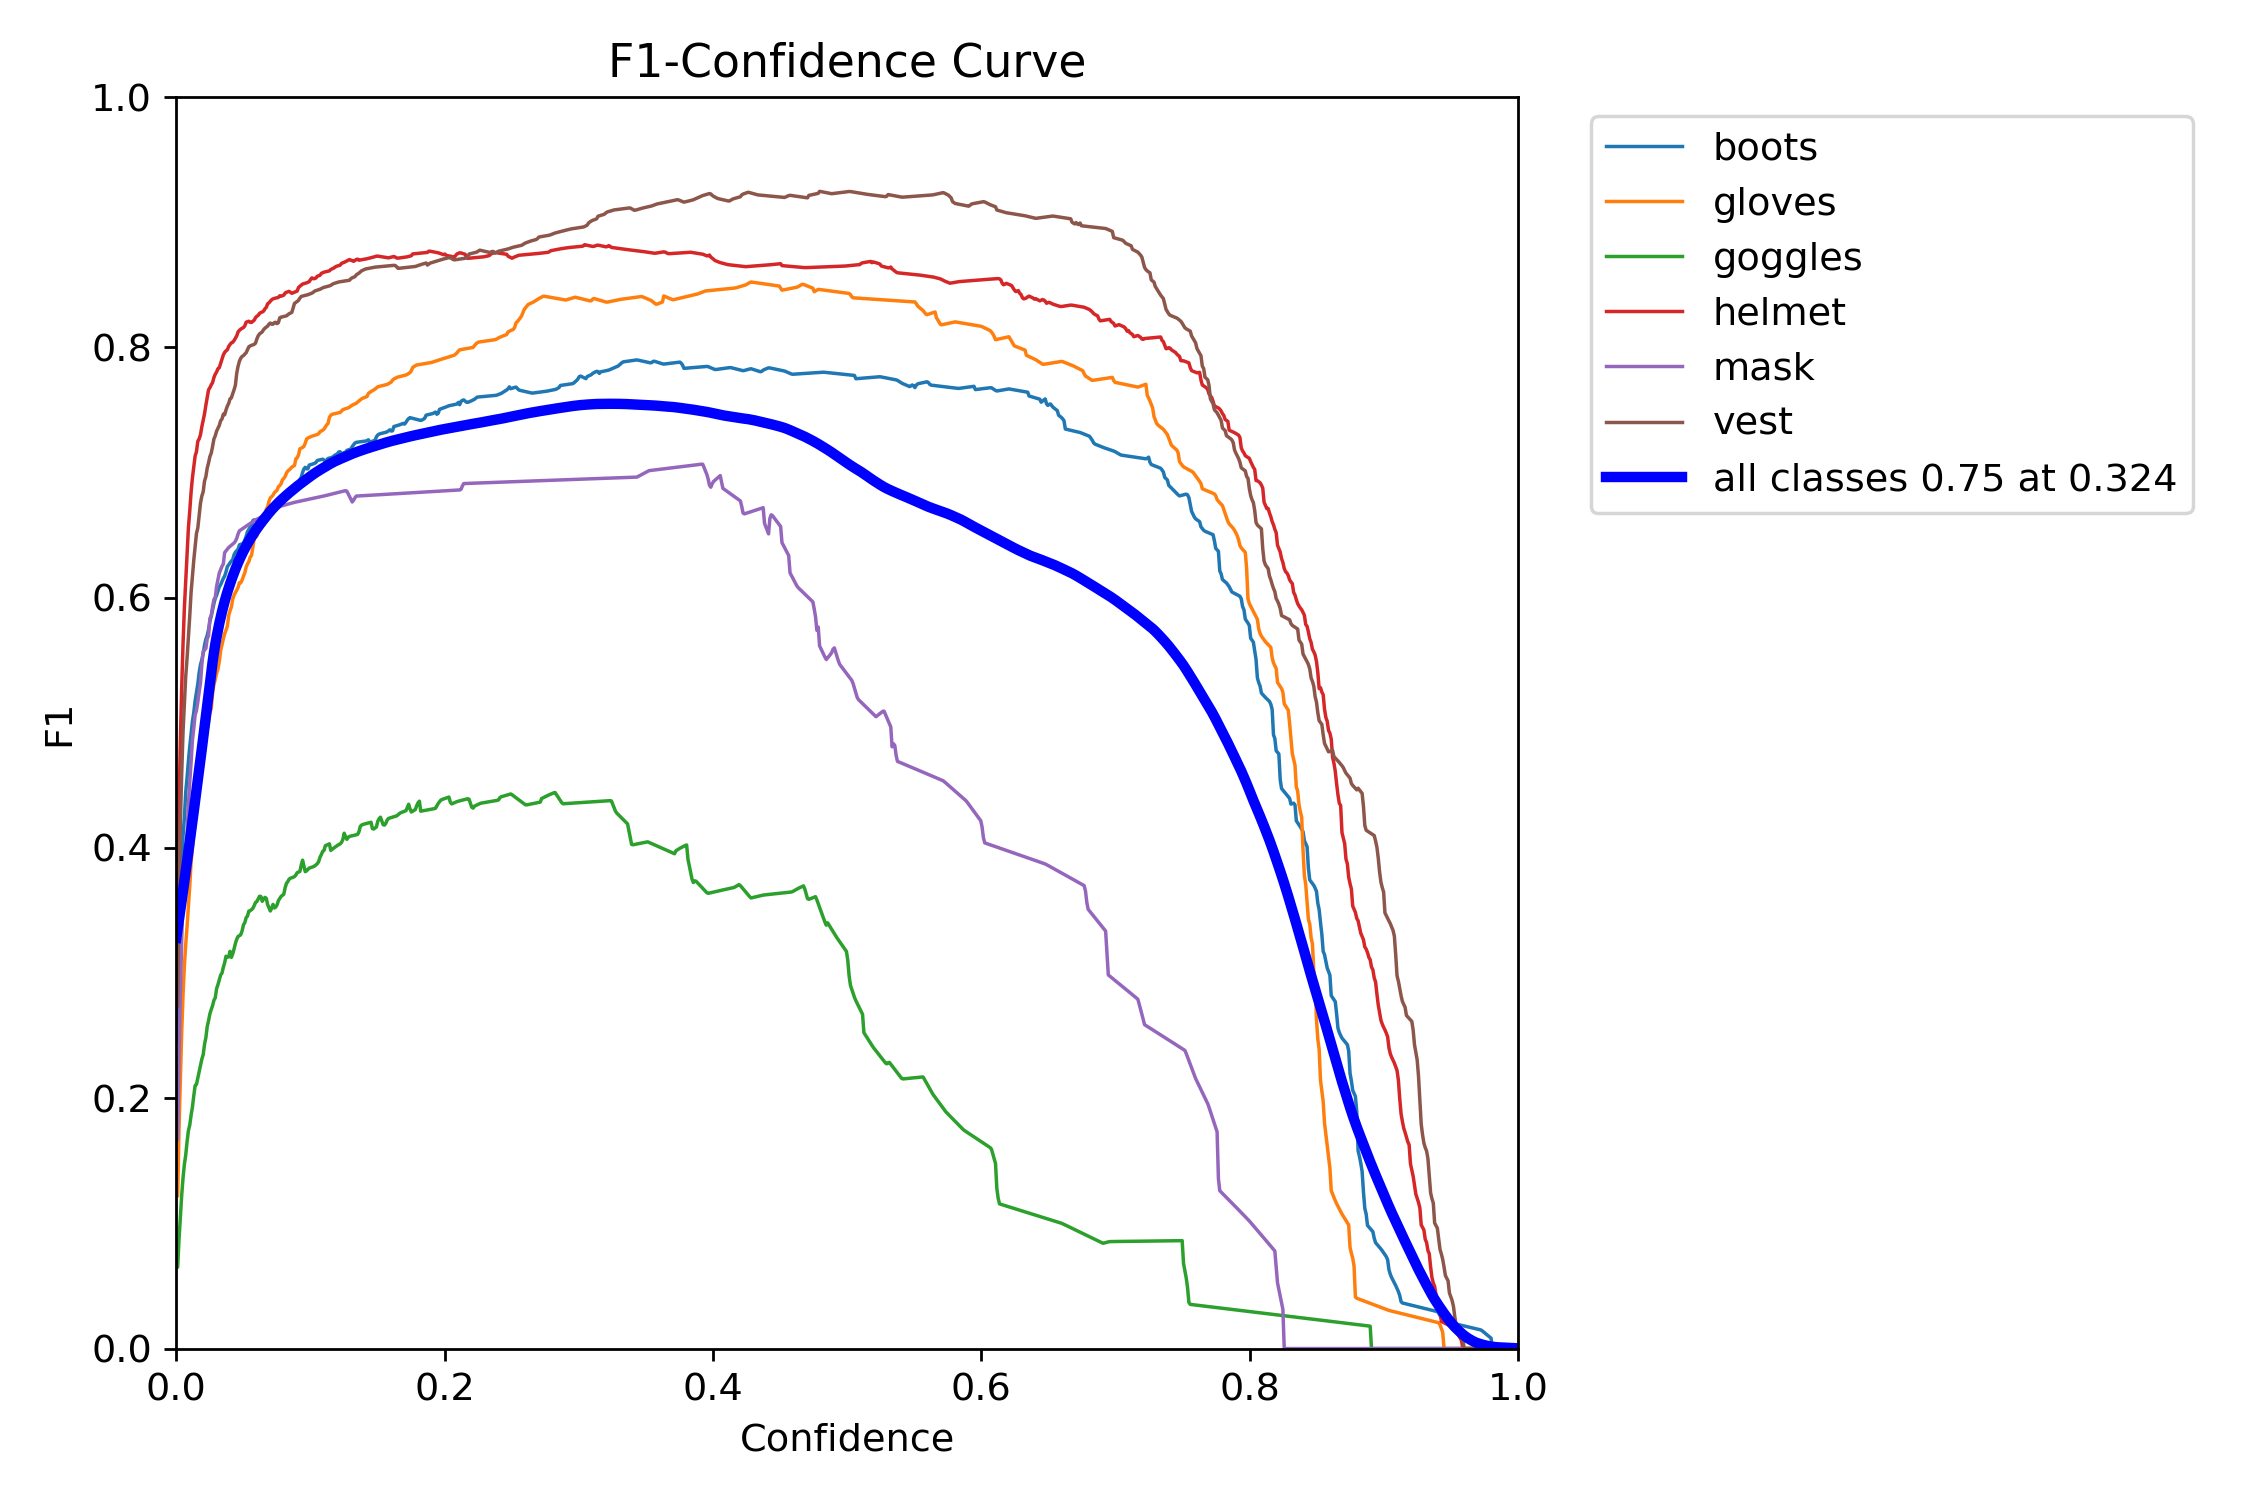

In [ ]:
Image(filename='runs/detect/train/F1_curve.png', width=600)

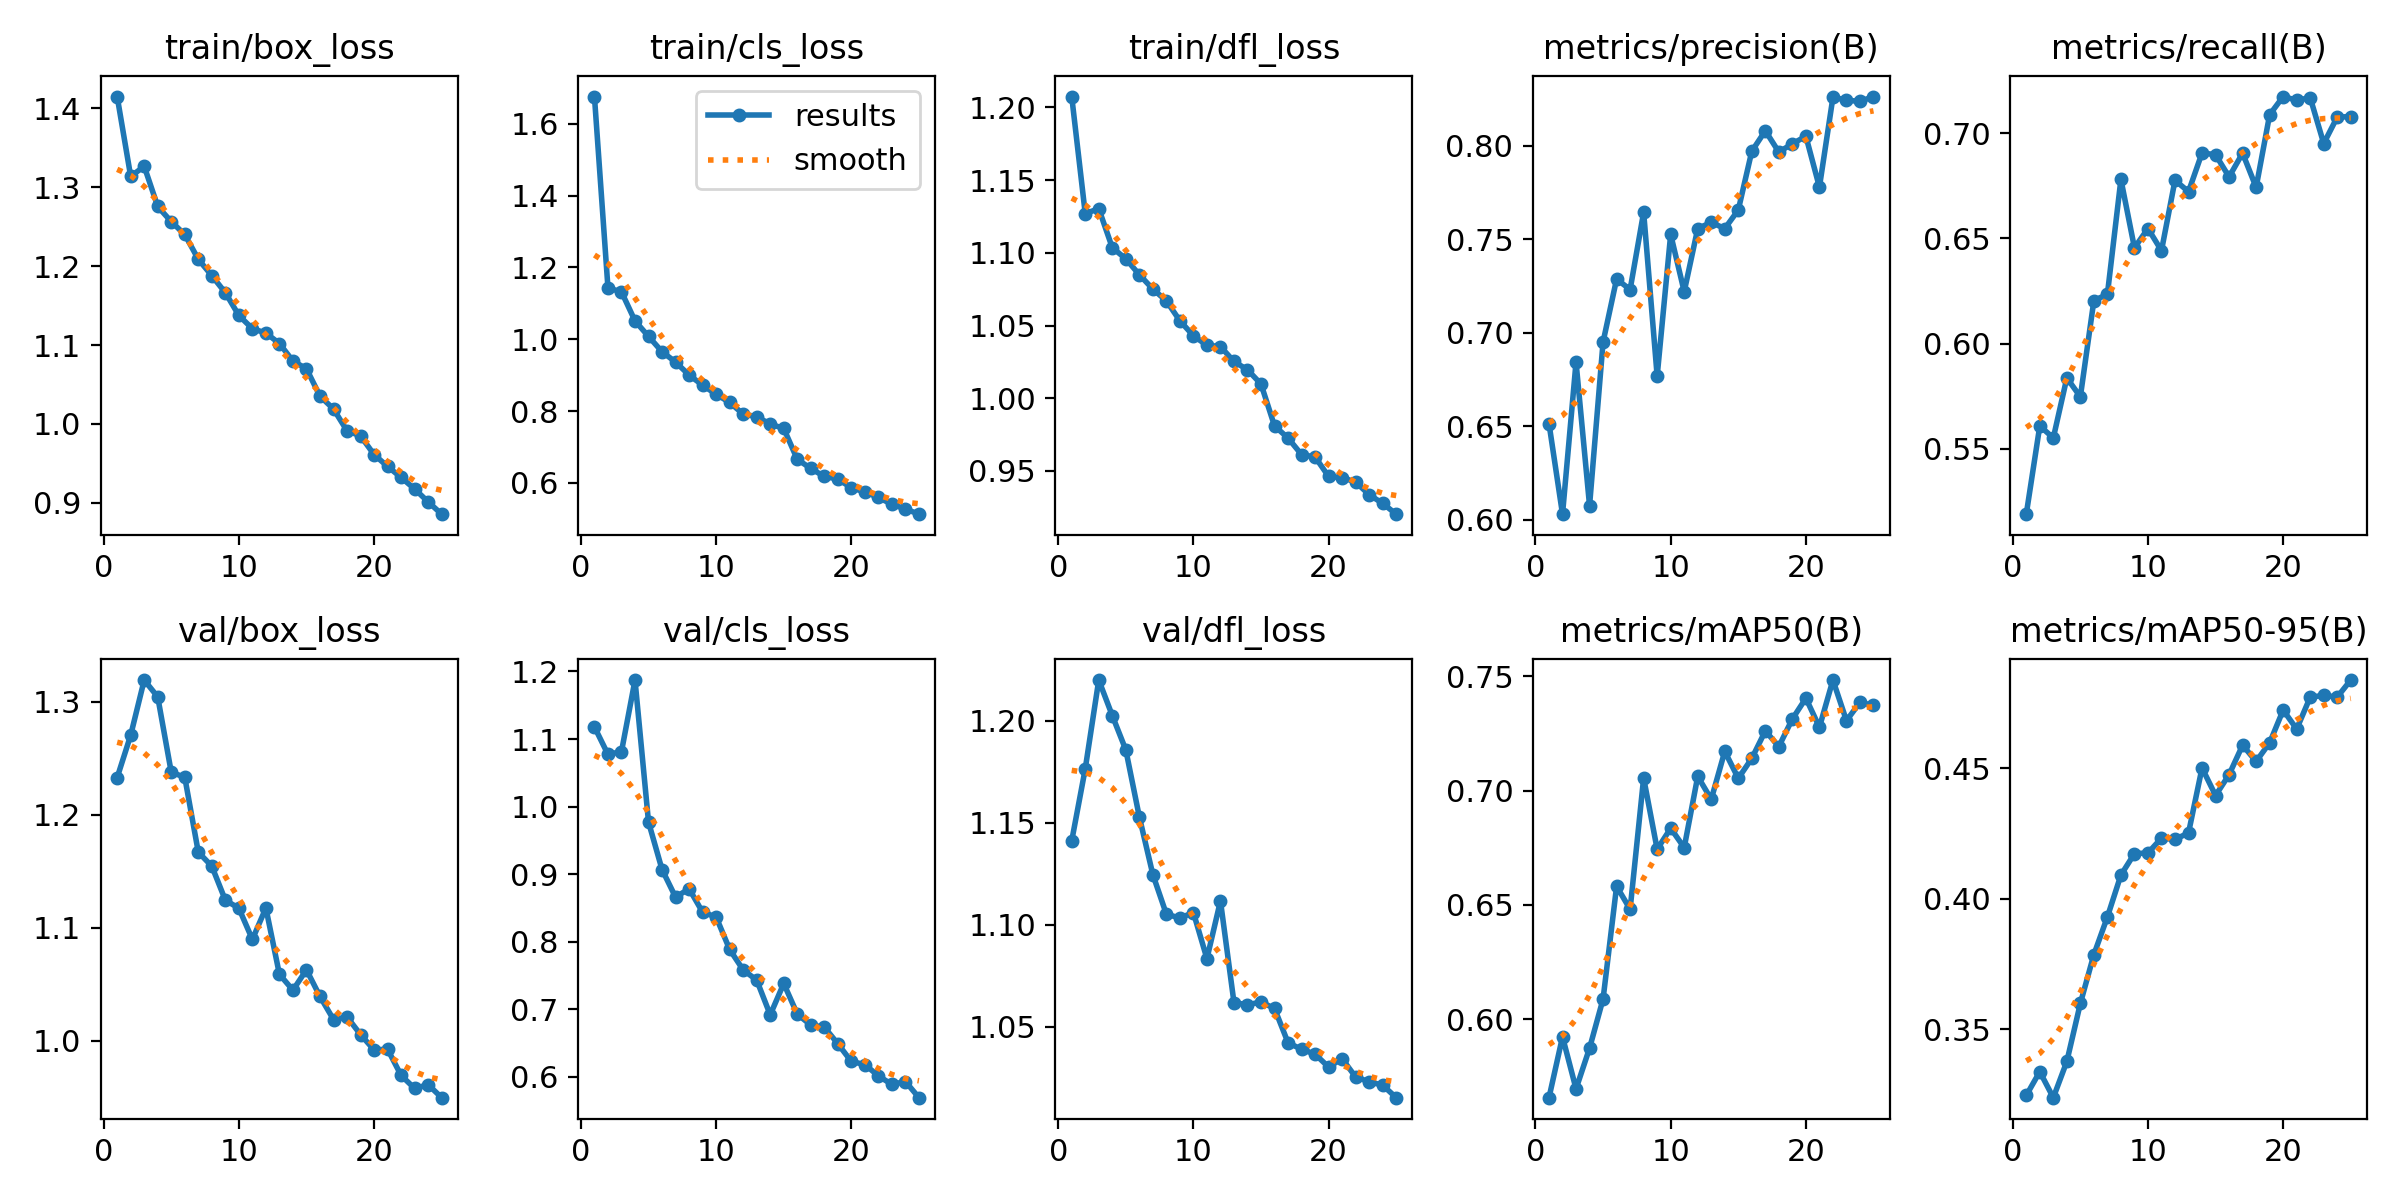

In [ ]:
Image(filename='runs/detect/train/results.png',width=600)

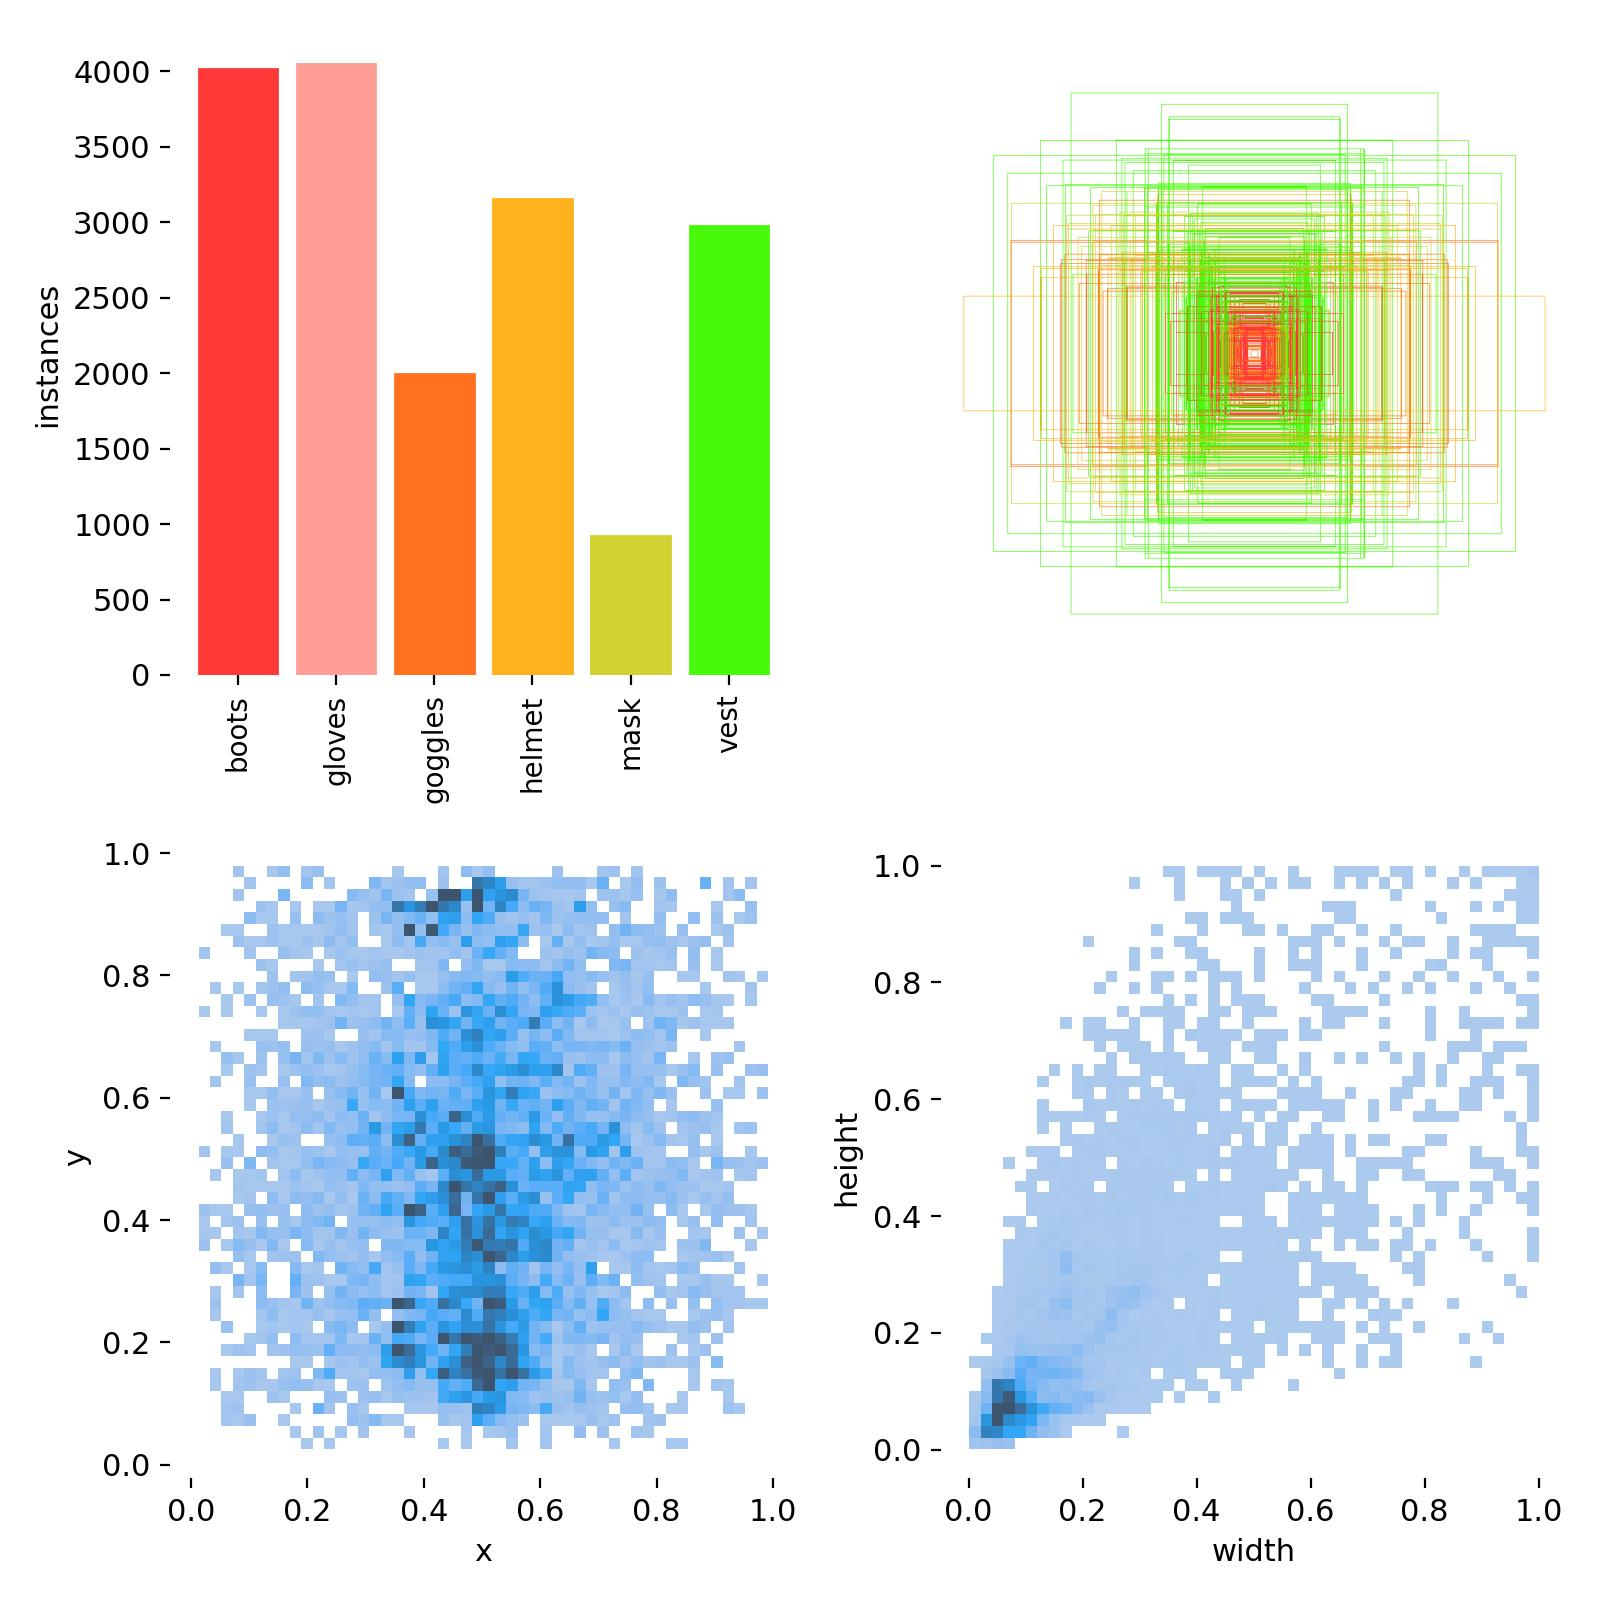

In [ ]:
Image(filename='runs/detect/train/labels.jpg', width=600)

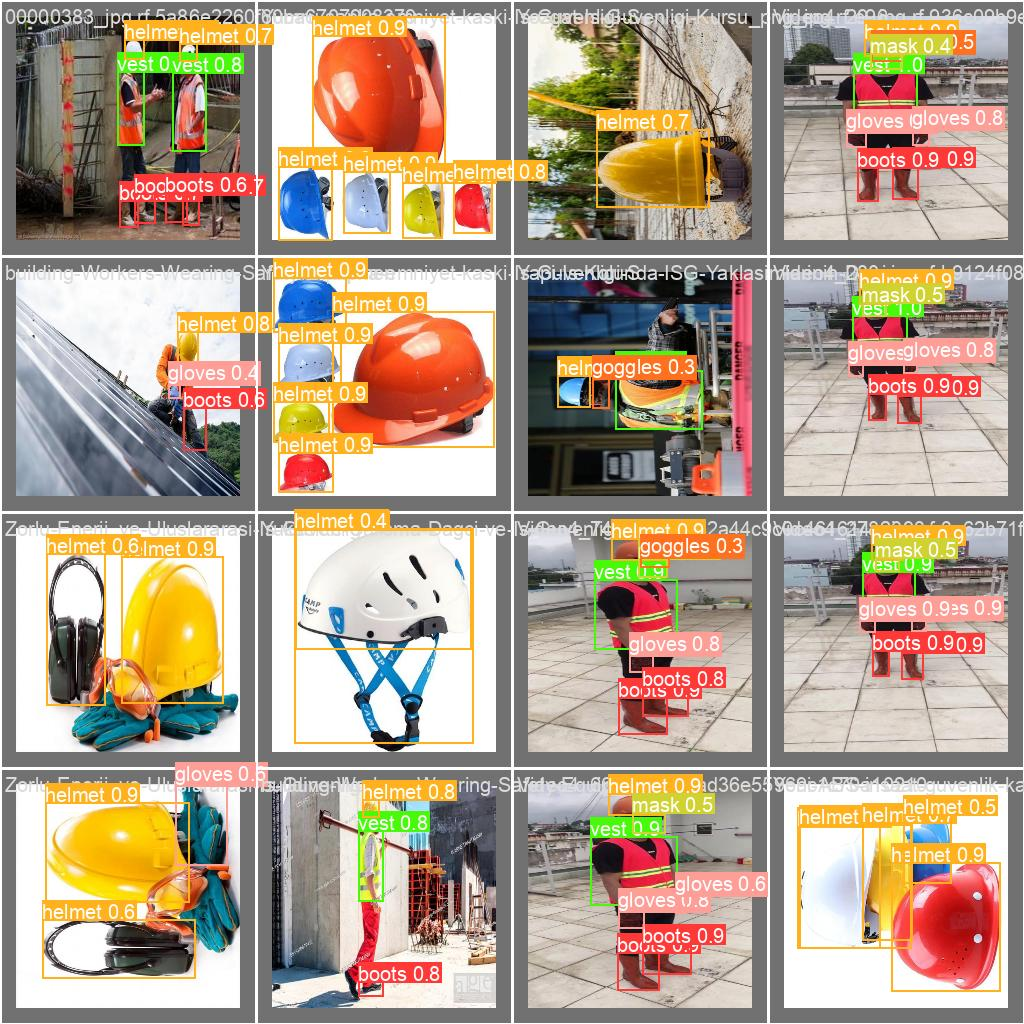

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg',width=600)

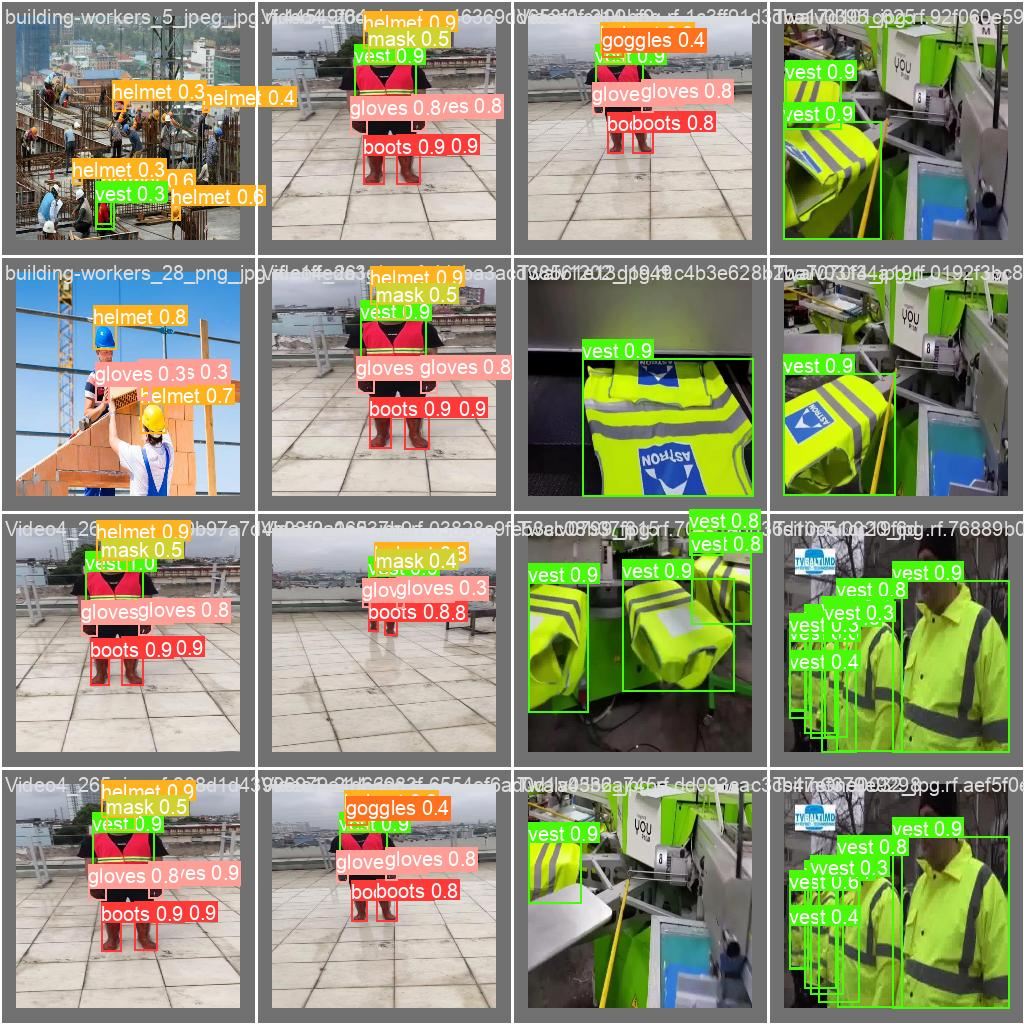

In [ ]:
Image(filename='runs/detect/train/val_batch1_pred.jpg',width=600)

# **Validation**

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/yolo/data/valid/labels.cache... 300 images, 0 backgrounds, 0 corrupt: 100% 300/300 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 19/19 [00:10<00:00,  1.74it/s]
                   all        300       1270      0.826      0.707      0.739      0.484
                 boots        300        268      0.884      0.705      0.765      0.509
                gloves        300        193       0.89      0.793      0.814      0.502
               goggles        300        111      0.627      0.319      0.355      0.148
                helmet        300        364      0.892       0.86      0.913      0.692
                  mask        300         74      0.769      0.635      0.634      0.317
                  vest        300   

# **Inference**

**It is the process of applying a trained model to a dataset and producing an output or prediction.**

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/yolo/data/test/images

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/155 /content/drive/MyDrive/yolo/data/test/images/00060_jpg.rf.eed85c55a7d61e9701ace7e59c2f561a.jpg: 224x224 2 bootss, 1 helmet, 16 vests, 7.4ms
image 2/155 /content/drive/MyDrive/yolo/data/test/images/00090_jpg.rf.e270d027dab9c448e67a599087daf807.jpg: 224x224 3 vests, 22.3ms
image 3/155 /content/drive/MyDrive/yolo/data/test/images/00107_jpg.rf.a6a5a6c22fccd55bfb77348dcfb6fe7c.jpg: 224x224 1 helmet, 1 vest, 12.5ms
image 4/155 /content/drive/MyDrive/yolo/data/test/images/00119_jpg.rf.c5f9b04de38fa6ba5cfd6c9881eb6452.jpg: 224x224 1 vest, 9.5ms
image 5/155 /content/drive/MyDrive/yolo/data/test/images/00126_jpg.rf.68f4e7c27f754cc983f634a43b5cbf1a.jpg: 224x224 1 goggles, 1 vest, 9.2ms
image 6/155 /content/drive/MyDrive/yolo/data/test/images/00248_jpg.rf.5a24db71b78922e66e973df1133f5a0c.jpg: 224x224 2 vests, 9.8ms
image

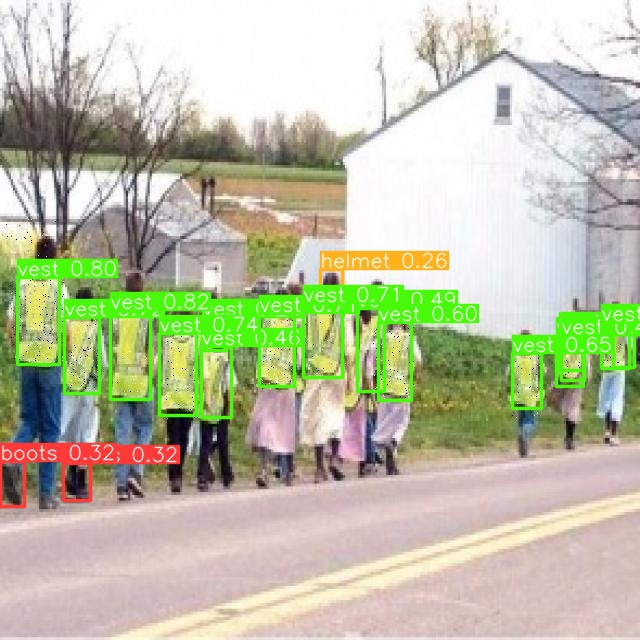

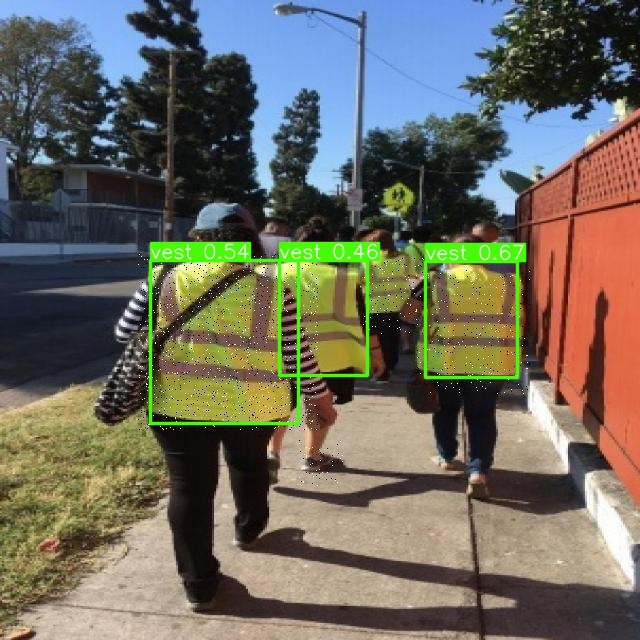

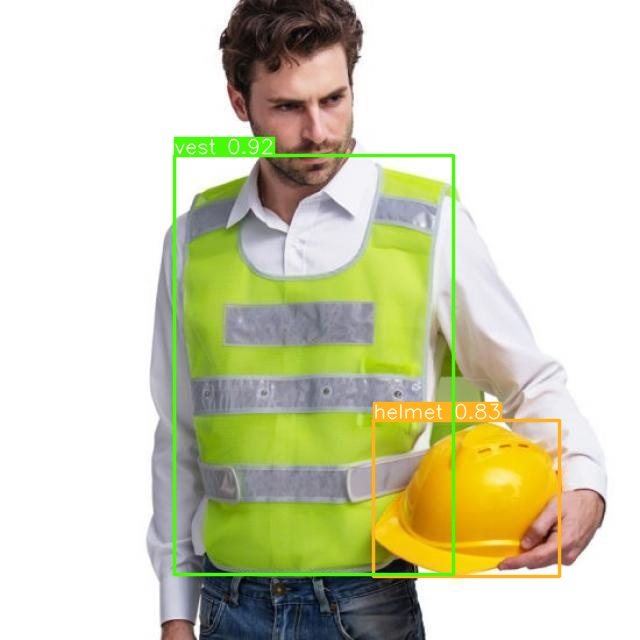

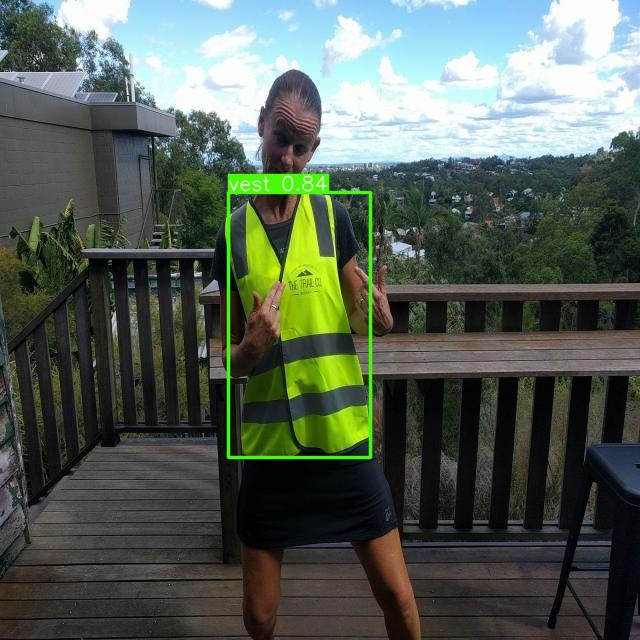

In [ ]:
import glob
from IPython.display import Image,display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:4]:
  display(Image(filename=image_path, width=600))
  print("\n")